In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read nad Load the data set
df=pd.read_csv('Student_Performance.csv')

In [3]:
# print the first 5 rows of the DataFrame
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
# shape of the data frame
print(df.shape)


(10000, 6)


In [5]:
# check the info of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
# check the null value in the data frame
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [7]:
# statical analysis of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


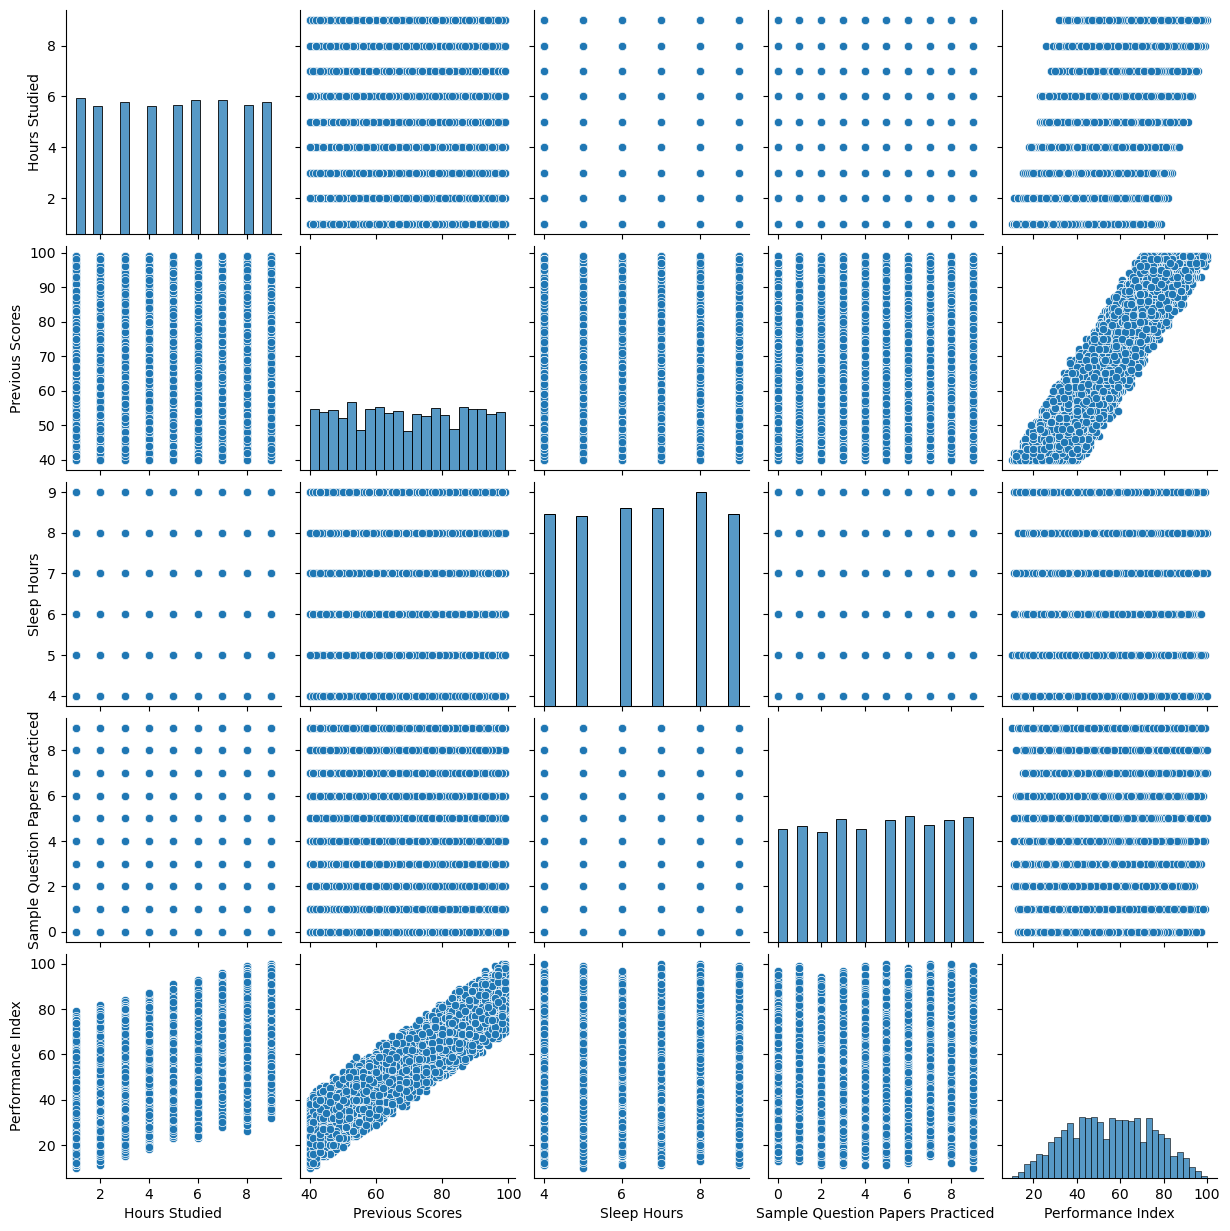

In [8]:
# pairplot
sns.pairplot(df, palette='husl')
plt.show()

In [10]:
from sklearn.preprocessing import  LabelEncoder
encoder=LabelEncoder()
df['Extracurricular Activities']=encoder.fit_transform(df['Extracurricular Activities'])

In [11]:
# correlation of the features
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


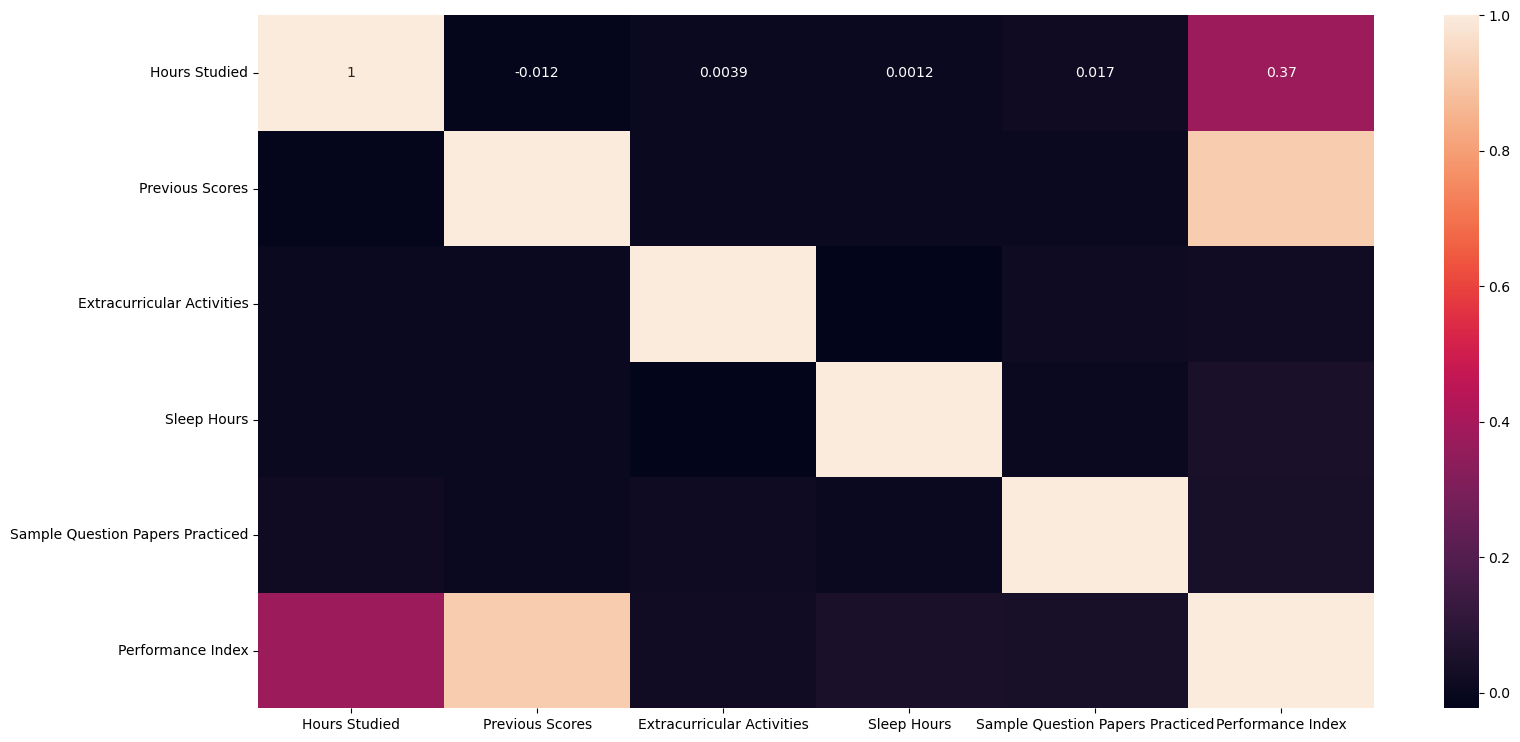

In [12]:
#correlation plot
fig=plt.figure(figsize=(18,9))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [13]:
#
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [14]:
# split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [15]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train) 
x_test=scaler.transform(x_test)

In [16]:
# build the linear regression model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [17]:
# check the crossvalidation score
from sklearn.model_selection import cross_val_score

validation_scores = cross_val_score(model, x_train, y_train, cv=3, scoring='neg_mean_squared_error')
print("crossvalidation_score:",validation_scores)
print("crossvalidation_score mean:", validation_scores.mean())

crossvalidation_score: [-4.36735143 -4.0421938  -4.19884562]
crossvalidation_score mean: -4.202796949539429


In [18]:
# prediction of the test data

y_pred=model.predict(x_test)

In [19]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
temp_df

,Actual,Predicted
6252,51.0,54.731879
4684,20.0,22.612111
1731,46.0,47.908388
4742,28.0,31.301042
4521,41.0,43.035815
...,...,...
4862,83.0,82.424359
7025,31.0,32.000419
7647,70.0,68.073970
7161,56.0,53.686368


<Axes: xlabel='Performance Index', ylabel='Count'>

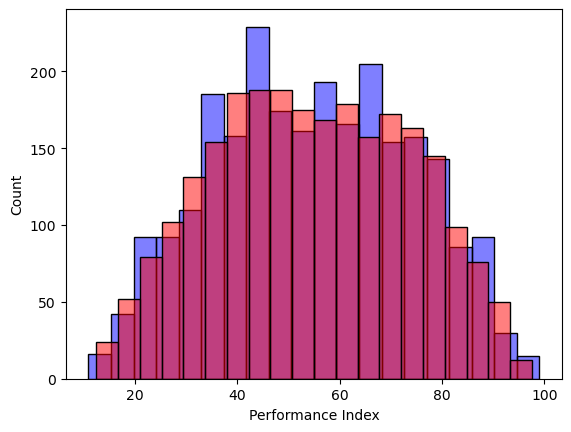

In [20]:
# histogram
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_pred, color='red', alpha=0.5)

In [21]:
# model performance
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred)
print('mean_squared_error:',mse)
print('mean_absolute_error:', mae)
print('root_mean_squared_error:', rmse)
print('r2_score:', r2)

mean_squared_error: 4.032544215419109
mean_absolute_error: 1.5975792091646093
root_mean_squared_error: 2.008119571992442
r2_score: 0.9890550757439104


**Assumptions**

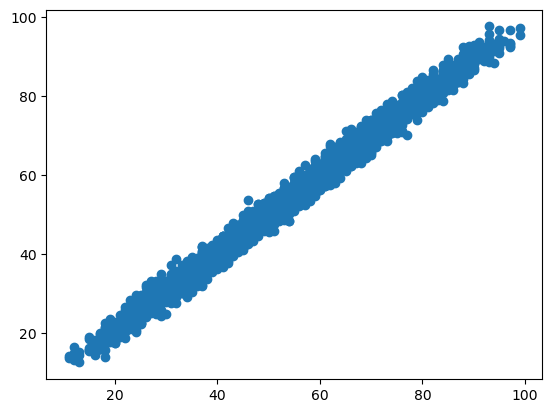

In [22]:
plt.scatter(y_test,y_pred)

In [23]:
residuals=y_test-y_pred
print(residuals)

6252   -3.731879
4684   -2.612111
1731   -1.908388
4742   -3.301042
4521   -2.035815
          ...   
4862    0.575641
7025   -1.000419
7647    1.926030
7161    2.313632
73     -2.858164
Name: Performance Index, Length: 2500, dtype: float64


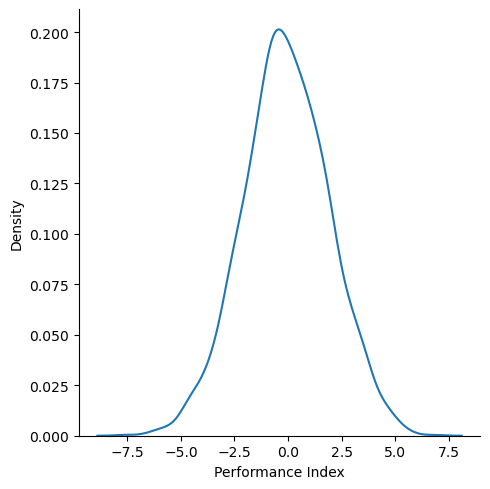

In [24]:
## Plot this residuals
sns.displot(residuals,kind='kde')

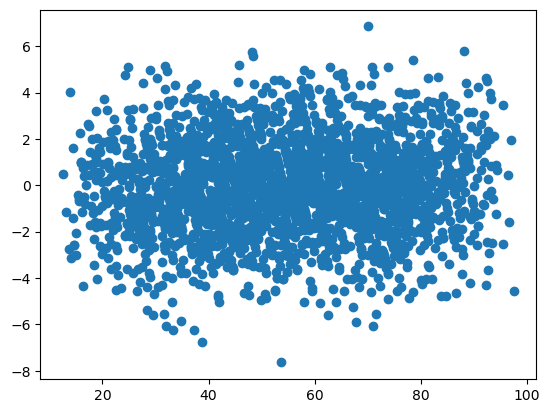

In [25]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [26]:
## OLS Linear Regression
import statsmodels.api as sm
model_1=sm.OLS(y_train,x_train).fit()

In [27]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Performance Index   R-squared (uncentered):                   0.106
Model:                            OLS   Adj. R-squared (uncentered):              0.105
Method:                 Least Squares   F-statistic:                              177.9
Date:                Sat, 04 May 2024   Prob (F-statistic):                   1.85e-179
Time:                        18:59:41   Log-Likelihood:                         -40759.
No. Observations:                7500   AIC:                                  8.153e+04
Df Residuals:                    7495   BIC:                                  8.156e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             7.4097      0.641     11.565      0.000       6.154       8.666
x2            17.6200      0.641     27.505      0.000      16.364      18.876
x3             0.2918      0.641      0.455      0.649      -0.964       1.548
x4             0.8102      0.641      1.265      0.206      -0.446       2.066
x5             0.5462      0.641      0.853      0.394      -0.710       1.802
==============================================================================
Omnibus:                        4.365   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                4.584
Skew:                           0.024   Prob(JB):                        0.101
Kurtosis:                       3.111   Cond. No.                         1.03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""